In [1]:
from desc.equilibrium import EquilibriaFamily
from desc.plotting import plot_comparison,plot_surfaces,plot_2d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

DESC version 0.4.13+588.gd46b316, using JAX backend, jax version=0.2.25, jaxlib version=0.1.76, dtype=float64
Using device: CPU, with 23.74 GB available memory


# Generate Boundary Fourier Series

In [2]:
# next step: take R,Z and fourier trans ->one boundary
# take R2 Z2 and fourier trans -> another bdry (with diff pol angle should be)

# then run with these bdrys for high res
# comp solutions (should be same)
# compare R* Z* zernike at zeta=0

In [3]:
# fourier transform R,Z

from desc.grid import Grid,LinearGrid
from desc.transform import Transform
from desc.basis import FourierSeries,DoubleFourierSeries
from desc.equilibrium import Equilibrium



In [4]:
t = np.linspace(0,2*np.pi,20,endpoint=False)
z = np.linspace(0,2*np.pi,20,endpoint=False)
factor=0.2
t2 =factor*np.sin(t) + t

Rbasis = DoubleFourierSeries(N=4,M=8,sym='cos')
Zbasis = DoubleFourierSeries(N=4,M=8,sym='sin')
Rgrid = LinearGrid(theta=t,N=len(z),rho=1,endpoint=False,sym=False)
Zgrid = LinearGrid(theta=t,rho=1,N=len(z),endpoint=False,sym=False)
Rtrans = Transform(basis=Rbasis,grid=Rgrid,build_pinv=True)
Ztrans = Transform(basis=Zbasis,grid=Zgrid,build_pinv=True)


Rgrid2 = LinearGrid(theta=t2,N=len(z),rho=1,endpoint=False,sym=False)
Zgrid2 = LinearGrid(theta=t2,rho=1,N=len(z),endpoint=False,sym=False)
Rtrans2 = Transform(basis=Rbasis,grid=Rgrid2,build_pinv=True)
Ztrans2 = Transform(basis=Zbasis,grid=Zgrid2,build_pinv=True)

Rgrid_fine = LinearGrid(M=100,N=100,rho=1,endpoint=True,sym=False)
Zgrid_fine = LinearGrid(M=100,N=100,rho=1,endpoint=True,sym=False)
Rtrans_fine = Transform(basis=Rbasis,grid=Rgrid_fine,build_pinv=True)
Ztrans_fine = Transform(basis=Zbasis,grid=Zgrid_fine,build_pinv=True)


In [5]:
t= Rgrid.nodes[:,1]
z = Rgrid.nodes[:,2]

# so instead of this... we need to instead load in the bdry fourier series of the poincare solution and then
# evaluate that on a R,Z grid in t,z and then fourier transform that...
# first need to save the poincare solution as an equil... ok we already did that beautiful so I can do some work rn

eq_poin_LCFS = EquilibriaFamily.load(load_from='SOLOVEV_LCFS_from_poincare_inc_p_output.h5')[-1]

coords = eq_poin_LCFS.compute("R", grid=Rgrid)
R=coords["R"]
Z=coords["Z"]

t2= Rgrid2.nodes[:,1]
z = Rgrid.nodes[:,2]

coords2 = eq_poin_LCFS.compute("R", grid=Rgrid2)
R2=coords2["R"]
Z2=coords2["Z"]


    


/home/dpanici/DESC/desc/io/hdf5_io.py:108: RuntimeWarning: Save attribute '_num_rho' was not loaded.
  warnings.warn(
/home/dpanici/DESC/desc/io/hdf5_io.py:108: RuntimeWarning: Save attribute '_num_theta' was not loaded.
  warnings.warn(
/home/dpanici/DESC/desc/io/hdf5_io.py:108: RuntimeWarning: Save attribute '_num_zeta' was not loaded.
  warnings.warn(


In [6]:
Rlmn = Rtrans.fit(R)
Zlmn = Ztrans.fit(Z)
Z_fitted = Ztrans_fine.transform(Zlmn)
R_fitted = Rtrans_fine.transform(Rlmn)



In [7]:
z

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.31415927, 0.31415927, 0.31415927, 0.31415927, 0.31415927,
       0.31415927, 0.31415927, 0.31415927, 0.31415927, 0.31415927,
       0.31415927, 0.31415927, 0.31415927, 0.31415927, 0.31415927,
       0.31415927, 0.31415927, 0.31415927, 0.31415927, 0.31415927,
       0.62831853, 0.62831853, 0.62831853, 0.62831853, 0.62831853,
       0.62831853, 0.62831853, 0.62831853, 0.62831853, 0.62831853,
       0.62831853, 0.62831853, 0.62831853, 0.62831853, 0.62831853,
       0.62831853, 0.62831853, 0.62831853, 0.62831853, 0.62831853,
       0.9424778 , 0.9424778 , 0.9424778 , 0.9424778 , 0.9424778 ,
       0.9424778 , 0.9424778 , 0.9424778 , 0.9424778 , 0.9424778 ,
       0.9424778 , 0.9424778 , 0.9424778 , 0.9424778 , 0.94247

In [8]:
np.shape(Rgrid.nodes)

(400, 3)

0
6
13


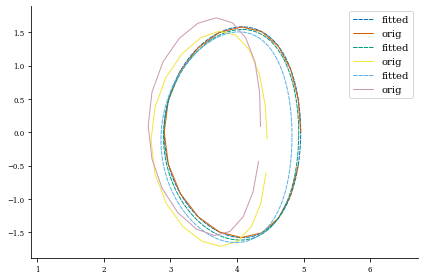

In [32]:
R_arr = R.reshape((Rgrid.M,Rgrid.N),order='F')
Z_arr = Z.reshape((Zgrid.M,Rgrid.N),order='F')
R2_arr = R2.reshape((Rgrid.M,Rgrid.N),order='F')
Z2_arr = Z2.reshape((Zgrid.M,Rgrid.N),order='F')

R_fitted_arr = R_fitted.reshape((Rgrid_fine.M,Rgrid_fine.N),order='F')
Z_fitted_arr = Z_fitted.reshape((Zgrid_fine.M,Rgrid_fine.N),order='F')

N=Rgrid.N

for i in range(3):
#     plt.figure()
    print(int(N*i/3))
    plt.plot(R_fitted_arr[:,int(N*i/3)],Z_fitted_arr[:,int(N*i/3)],'--',label='fitted')
    plt.plot(R_arr[:,int(N*i/3)],Z_arr[:,int(N*i/3)],label='orig')
    plt.legend()
    plt.axis('equal')

# for i in range(3):

#     plt.figure()
#     plt.plot(R_fitted_arr[int(N*i/3),:],Z_fitted_arr[int(N*i/3),:],label='fitted')
#     plt.plot(R_arr[:,int(N*i/3)],Z_arr[:,int(N*i/3)],label='orig')
#     plt.legend()
#     plt.axis('equal')


In [10]:
R_fitted_arr[:,10]

DeviceArray([4.87693528, 4.87607094, 4.87239304, 4.86587982, 4.85650399,
             4.8442346 , 4.8290389 , 4.81088441, 4.78974113, 4.76558427,
             4.73839752, 4.70817688, 4.67493482, 4.63870436, 4.59954235,
             4.55753147, 4.51278021, 4.46542072, 4.41560439, 4.36349585,
             4.30926619, 4.25308651, 4.19512328, 4.13553639, 4.07448072,
             4.01211136, 3.94859203, 3.88410544, 3.81886412, 3.75311969,
             3.68716895, 3.62135536, 3.55606502, 3.49171749, 3.42875212,
             3.36761167, 3.30872528, 3.25249296, 3.19927376, 3.14937897,
             3.10307104, 3.06056797, 3.02205221, 2.987682  , 2.9576033 ,
             2.93195989, 2.91089984, 2.89457711, 2.88314779, 2.87676142,
             2.87554861, 2.87960686, 2.88898656, 2.90367933, 2.92361052,
             2.94863681, 2.97854957, 3.01308319, 3.05192765, 3.09474338,
             3.14117658, 3.19087318, 3.24348976, 3.29870043, 3.35619919,
             3.41569815, 3.47692239, 3.53960287, 3.

In [11]:
Rlmn2 = Rtrans2.fit(R)
Zlmn2 = Ztrans2.fit(Z)
Z_fitted2 = Ztrans_fine.transform(Zlmn2)
R_fitted2 = Rtrans_fine.transform(Rlmn2)


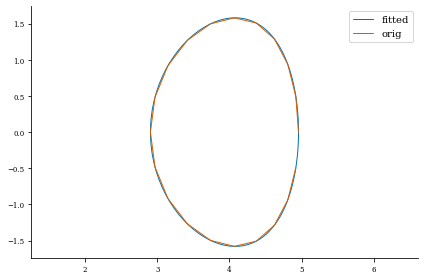

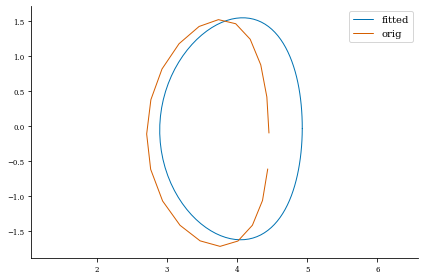

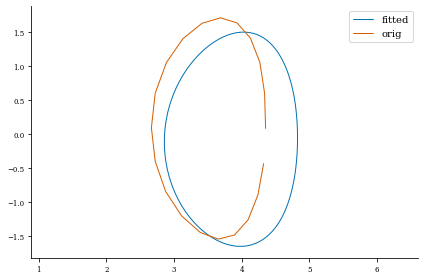

In [12]:
R_arr2 = R.reshape((Rgrid2.M,Rgrid2.N),order='F')
Z_arr2 = Z.reshape((Zgrid2.M,Rgrid2.N),order='F')

R_fitted_arr2 = R_fitted2.reshape((Rgrid_fine.M,Rgrid_fine.N),order='F')
Z_fitted_arr2 = Z_fitted2.reshape((Zgrid_fine.M,Rgrid_fine.N),order='F')


for i in range(3):

    plt.figure()
    plt.plot(R_fitted_arr2[:,int(N*i/3)],Z_fitted_arr2[:,int(N*i/3)],label='fitted')
    plt.plot(R_arr2[:,int(N*i/3)],Z_arr2[:,int(N*i/3)],label='orig')
    plt.legend()
    plt.axis('equal')

In [30]:
np.shape(R)

(400,)

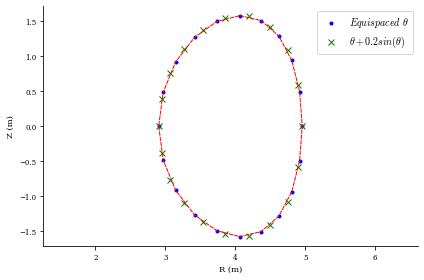

In [45]:
for i in range(1):
    plt.figure()

    
    plt.plot(list(R_arr[2:,0])+list(R_arr[0:3,0]),list(Z_arr[2:,0])+list(Z_arr[0:3,0]),'r--')
    
    plt.scatter(R_arr[:,0],Z_arr[:,0],c='b',marker='.',label=r'$Equispaced~ \theta$')
    plt.scatter(R2_arr[:,0],Z2_arr[:,0],c='g',marker='x',label=r'$\theta + 0.2sin(\theta)$')
    plt.axis('equal')
    plt.legend()
    plt.xlabel('R (m)')
    plt.ylabel('Z (m)')
    

In [41]:
list(R_arr[:,0])+R_arr[0,0]

TypeError: can only concatenate list (not "DeviceArray") to list

In [13]:
print(' equispaced poloidal angle basis ')
for i in range(len(Rlmn)):
    m=Rbasis.modes[i,1]
    n=Rbasis.modes[i,2]
    print(f'm:    {m} n:    {n} R1={Rlmn[i]:1.3f}')


 equispaced poloidal angle basis 
m:    -8 n:    -4 R1=0.000
m:    -7 n:    -4 R1=-0.000
m:    -6 n:    -4 R1=-0.000
m:    -5 n:    -4 R1=-0.000
m:    -4 n:    -4 R1=-0.000
m:    -3 n:    -4 R1=0.000
m:    -2 n:    -4 R1=0.000
m:    -1 n:    -4 R1=0.000
m:    -8 n:    -3 R1=0.000
m:    -7 n:    -3 R1=-0.000
m:    -6 n:    -3 R1=-0.000
m:    -5 n:    -3 R1=0.000
m:    -4 n:    -3 R1=0.000
m:    -3 n:    -3 R1=0.000
m:    -2 n:    -3 R1=0.000
m:    -1 n:    -3 R1=-0.000
m:    -8 n:    -2 R1=0.000
m:    -7 n:    -2 R1=-0.000
m:    -6 n:    -2 R1=-0.000
m:    -5 n:    -2 R1=0.000
m:    -4 n:    -2 R1=0.000
m:    -3 n:    -2 R1=0.000
m:    -2 n:    -2 R1=0.002
m:    -1 n:    -2 R1=0.012
m:    -8 n:    -1 R1=-0.000
m:    -7 n:    -1 R1=0.001
m:    -6 n:    -1 R1=-0.001
m:    -5 n:    -1 R1=0.001
m:    -4 n:    -1 R1=0.000
m:    -3 n:    -1 R1=-0.000
m:    -2 n:    -1 R1=-0.004
m:    -1 n:    -1 R1=-0.006
m:    0 n:    0 R1=3.742
m:    1 n:    0 R1=0.911
m:    2 n:    0 R1=-0.077
m:    3 n:  

In [14]:
print(' non-equispaced poloidal angle basis ')
for i in range(len(Rlmn2)):
    m=Rbasis.modes[i,1]
    n=Rbasis.modes[i,2]
    print(f'm:    {m} n:    {n} R1={Rlmn2[i]:1.9f}')

 non-equispaced poloidal angle basis 
m:    -8 n:    -4 R1=-0.000000000
m:    -7 n:    -4 R1=-0.000000000
m:    -6 n:    -4 R1=0.000000000
m:    -5 n:    -4 R1=0.000000000
m:    -4 n:    -4 R1=0.000000000
m:    -3 n:    -4 R1=0.000000000
m:    -2 n:    -4 R1=-0.000000000
m:    -1 n:    -4 R1=0.000000000
m:    -8 n:    -3 R1=0.000001524
m:    -7 n:    -3 R1=0.000010365
m:    -6 n:    -3 R1=-0.000016157
m:    -5 n:    -3 R1=-0.000021587
m:    -4 n:    -3 R1=0.000026917
m:    -3 n:    -3 R1=0.000036107
m:    -2 n:    -3 R1=0.000190960
m:    -1 n:    -3 R1=-0.000095947
m:    -8 n:    -2 R1=0.000023232
m:    -7 n:    -2 R1=0.000068725
m:    -6 n:    -2 R1=-0.000172999
m:    -5 n:    -2 R1=-0.000199866
m:    -4 n:    -2 R1=0.000302132
m:    -3 n:    -2 R1=0.000008596
m:    -2 n:    -2 R1=0.000327426
m:    -1 n:    -2 R1=0.012060281
m:    -8 n:    -1 R1=-0.000741468
m:    -7 n:    -1 R1=0.001111256
m:    -6 n:    -1 R1=-0.001078013
m:    -5 n:    -1 R1=0.000377708
m:    -4 n:    -1 R1=0.00080

In [15]:
print(' equispaced poloidal angle basis ')

for i in range(len(Zlmn)):
    m=Zbasis.modes[i,1]
    n=Zbasis.modes[i,2]
    print(f'm:    {m} n:    {n} Z1={Zlmn[i]:1.3f}')

 equispaced poloidal angle basis 
m:    0 n:    -4 Z1=-0.000
m:    1 n:    -4 Z1=0.000
m:    2 n:    -4 Z1=-0.000
m:    3 n:    -4 Z1=0.000
m:    4 n:    -4 Z1=-0.000
m:    5 n:    -4 Z1=0.000
m:    6 n:    -4 Z1=-0.000
m:    7 n:    -4 Z1=0.000
m:    8 n:    -4 Z1=-0.000
m:    0 n:    -3 Z1=0.000
m:    1 n:    -3 Z1=0.000
m:    2 n:    -3 Z1=0.000
m:    3 n:    -3 Z1=0.000
m:    4 n:    -3 Z1=0.000
m:    5 n:    -3 Z1=0.000
m:    6 n:    -3 Z1=-0.000
m:    7 n:    -3 Z1=0.000
m:    8 n:    -3 Z1=-0.000
m:    0 n:    -2 Z1=-0.000
m:    1 n:    -2 Z1=0.002
m:    2 n:    -2 Z1=0.000
m:    3 n:    -2 Z1=-0.000
m:    4 n:    -2 Z1=0.001
m:    5 n:    -2 Z1=-0.000
m:    6 n:    -2 Z1=0.000
m:    7 n:    -2 Z1=-0.000
m:    8 n:    -2 Z1=0.000
m:    0 n:    -1 Z1=-0.110
m:    1 n:    -1 Z1=0.018
m:    2 n:    -1 Z1=-0.006
m:    3 n:    -1 Z1=-0.008
m:    4 n:    -1 Z1=0.003
m:    5 n:    -1 Z1=-0.002
m:    6 n:    -1 Z1=0.002
m:    7 n:    -1 Z1=0.000
m:    8 n:    -1 Z1=-0.000
m:    -8 n:   

In [16]:
print(' non-equispaced poloidal angle basis ')

for i in range(len(Zlmn2)):
    m=Zbasis.modes[i,1]
    n=Zbasis.modes[i,2]
    print(f'm:    {m} n:    {n} Z1={Zlmn2[i]:1.9f}')
# either take these and throw them into an input file... yea do that, throw into input files with the correct pressure prof 
# and LCFS condition and these bdrys. Solve with same tols (high) and same perturbations

 non-equispaced poloidal angle basis 
m:    0 n:    -4 Z1=0.000000000
m:    1 n:    -4 Z1=-0.000000000
m:    2 n:    -4 Z1=0.000000000
m:    3 n:    -4 Z1=0.000000000
m:    4 n:    -4 Z1=0.000000000
m:    5 n:    -4 Z1=-0.000000000
m:    6 n:    -4 Z1=-0.000000000
m:    7 n:    -4 Z1=0.000000000
m:    8 n:    -4 Z1=-0.000000000
m:    0 n:    -3 Z1=0.000100056
m:    1 n:    -3 Z1=0.000073593
m:    2 n:    -3 Z1=0.000024486
m:    3 n:    -3 Z1=0.000038560
m:    4 n:    -3 Z1=-0.000004770
m:    5 n:    -3 Z1=0.000007466
m:    6 n:    -3 Z1=-0.000013391
m:    7 n:    -3 Z1=0.000007006
m:    8 n:    -3 Z1=-0.000007929
m:    0 n:    -2 Z1=0.000147213
m:    1 n:    -2 Z1=0.002425543
m:    2 n:    -2 Z1=-0.000106014
m:    3 n:    -2 Z1=-0.000062463
m:    4 n:    -2 Z1=0.000389436
m:    5 n:    -2 Z1=-0.000353093
m:    6 n:    -2 Z1=0.000280988
m:    7 n:    -2 Z1=-0.000148878
m:    8 n:    -2 Z1=0.000089538
m:    0 n:    -1 Z1=-0.108065835
m:    1 n:    -1 Z1=0.016398932
m:    2 n:    -1 Z1=-0

In [17]:
# eqdiffang = EquilibriaFamily.load(load_from='HELIOTRON/HELIOTRON_t_05_sint_higher_M_output.h5')[-1]
# # eqdiffang.surface.R_basis=Rbasis
# # eqdiffang.surface.Z_basis=Zbasis
# for i in range(len(Zlmn)):
#     m=Zbasis.modes[i,1]
#     n=Zbasis.modes[i,2]
#     print(f'm:    {m} n:    {n} Z1={Zlmn[i]:1.3f}')
#     eqdiffang.surface.set_coeffs(m=m,n=n,Z=Zlmn[i])
# for i in range(len(Rlmn)):
#     m=Rbasis.modes[i,1]
#     n=Rbasis.modes[i,2]
#     print(f'm:    {m} n:    {n} R1={Rlmn[i]:1.3f}')
#     eqdiffang.surface.set_coeffs(m=m,n=n,R=Rlmn[i])


In [18]:
# print(eqdiffang.surface.get_coeffs(m=-5,n=0))
# print(eq_poin_LCFS.surface.get_coeffs(m=-5,n=0))
# print(Zlmn[0])
# # how canI freaking tell if this worked.. maybe just throw it in an input file anyways and see what happens.

In [19]:
# plot_comparison(eqs=[eq_poin_LCFS,eqdiffang],labels=['orig','diff ang'])

## Compare solutions (they are the same)


/home/dpanici/DESC/desc/io/hdf5_io.py:108: RuntimeWarning: Save attribute '_num_rho' was not loaded.
  warnings.warn(
/home/dpanici/DESC/desc/io/hdf5_io.py:108: RuntimeWarning: Save attribute '_num_theta' was not loaded.
  warnings.warn(
/home/dpanici/DESC/desc/io/hdf5_io.py:108: RuntimeWarning: Save attribute '_num_zeta' was not loaded.
  warnings.warn(


(<Figure size 864x720 with 6 Axes>,
 array([<AxesSubplot:title={'center':'$\\zeta \\cdot NFP/2\\pi = 0.000$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <AxesSubplot:title={'center':'$\\zeta \\cdot NFP/2\\pi = 0.167$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <AxesSubplot:title={'center':'$\\zeta \\cdot NFP/2\\pi = 0.333$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <AxesSubplot:title={'center':'$\\zeta \\cdot NFP/2\\pi = 0.500$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <AxesSubplot:title={'center':'$\\zeta \\cdot NFP/2\\pi = 0.667$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <AxesSubplot:title={'center':'$\\zeta \\cdot NFP/2\\pi = 0.833$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>],
       dtype=object))

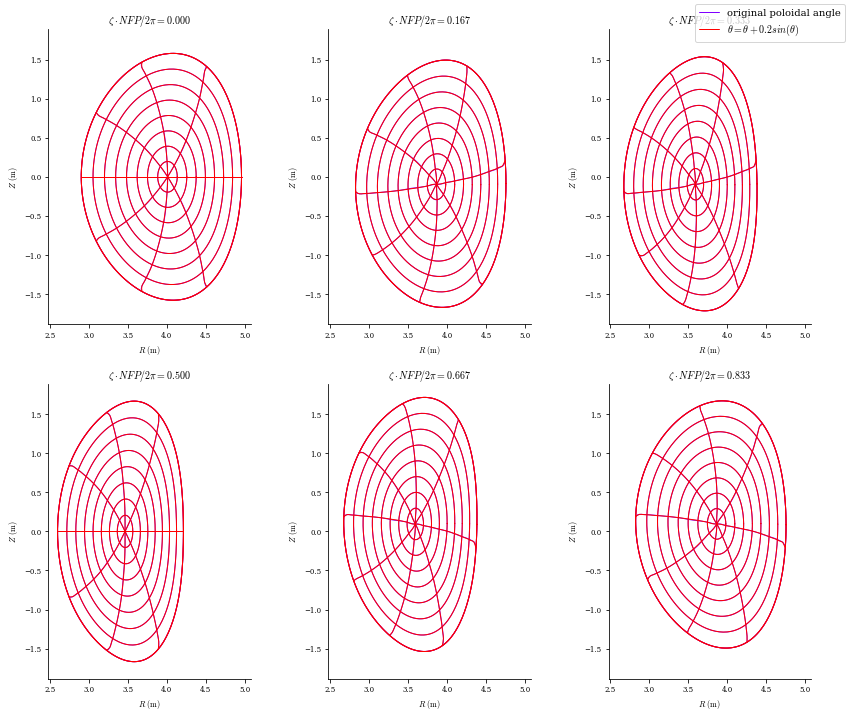

In [28]:
# eq_poin_LCFS = EquilibriaFamily.load(load_from='SOLOVEV_LCFS_from_poincare_inc_p_output.h5')[-1]
# eq_poin_LCFS = EquilibriaFamily.load(load_from='SOLOVEV_LCFS_from_poincare_inc_p_less_res_output.h5')[-1]
eq_poin_LCFS = EquilibriaFamily.load(load_from='SOLOVEV_LCFS_from_poincare_inc_p_less_res_more_M_output.h5')[-1]


# eq_diff_angle = EquilibriaFamily.load(load_from='SOLOVEV_LCFS_from_poincare_inc_p_diff_bdry_angle_output.h5')[-1]
# eq_diff_angle = EquilibriaFamily.load(load_from='SOLOVEV_LCFS_from_poincare_inc_p_diff_bdry_angle_less_res_output.h5')[-1]
eq_diff_angle = EquilibriaFamily.load(load_from='SOLOVEV_LCFS_from_poincare_inc_p_diff_bdry_angle_less_res_more_M_output.h5')[-1]

plot_comparison(eqs=[eq_poin_LCFS,eq_diff_angle],labels=['original poloidal angle',r'$\theta = \theta + 0.2sin(\theta)$'])

(<Figure size 288x288 with 1 Axes>,
 <AxesSubplot:xlabel='$\\rho$', ylabel='$\\lambda~(rad)$'>)

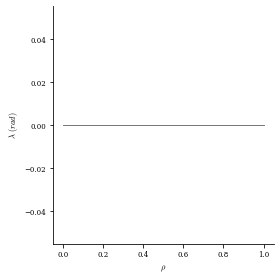